# Pandas and Python

From here: https://github.com/cs109/2015lab1/blob/master/Lab1-pythonpandas.ipynb

Pandas cheatsheet: https://drive.google.com/drive/folders/0ByIrJAE4KMTtaGhRcXkxNHhmY2M

We've got a csv of data scraped from Goodreads.

Nice little diagram of a df:
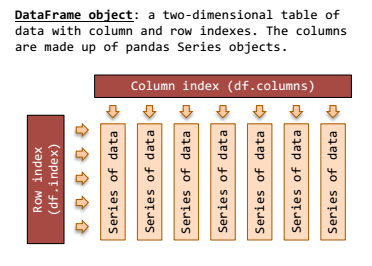

In [31]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [1]:
df = pd.read_csv("all.csv", header=None, names = ["rating","review_count", "isbn", "booktype", "author_url", "year","genre_urls", "dir", "rating_count", "name"],)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [2]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [3]:
df.shape

(6000, 10)

In [4]:
df.describe

<bound method NDFrame.describe of       rating review_count        isbn         booktype                                         author_url    year                                         genre_urls                                                dir rating_count                                               name
0       4.40       136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008.0  /genres/young-adult|/genres/science-fiction|/g...                dir01/2767052-the-hunger-games.html      2958974            The Hunger Games (The Hunger Games, #1)
1       4.41        16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003.0  /genres/fantasy|/genres/young-adult|/genres/fi...  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478  Harry Potter and the Order of the Phoenix (Har...
2       3.56        85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005.0  /genres/you

In [5]:
df.columns

Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

In [6]:
type(df.rating), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### Querying

In [7]:
df.rating < 3

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Name: rating, Length: 6000, dtype: bool

A series of Trues and Falses is called a mask

In [8]:
np.sum(df.rating < 3)

4

In [9]:
print(1*True, 1*False)

1 0


In [10]:
np.sum(df.rating < 3.0)/df.shape[0]

0.0006666666666666666

In [11]:
np.mean(df.rating < 3.0)

0.0006666666666666666

### Filtering

Two ways to filter a dataframe:

In [12]:
df.query("rating > 4.5")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973.0,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007.0,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000.0,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010.0,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005.0,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes
...,...,...,...,...,...,...,...,...,...,...
5806,4.57,121,0679777458,good_reads:book,https://www.goodreads.com/author/show/8361.Dor...,1966.0,/genres/historical-fiction|/genres/fiction|/ge...,dir59/351211.The_Disorderly_Knights.html,2177,"The Disorderly Knights (The Lymond Chronicles,..."
5873,4.55,103,144247372X,good_reads:book,https://www.goodreads.com/author/show/2876763....,2012.0,/genres/fantasy|/genres/paranormal|/genres/ang...,dir59/14367071-the-complete-hush-hush-saga.html,2869,"The Complete Hush, Hush Saga"
5874,4.78,18,2851944371,good_reads:book,https://www.goodreads.com/author/show/318835.O...,1972.0,/genres/poetry|/genres/fiction|/genres/nobel-p...,dir59/2014000.Le_Monogramme.html,565,Le Monogramme
5880,4.61,123,NaN,good_reads:book,https://www.goodreads.com/author/show/4942228....,2010.0,/genres/romance|/genres/m-m-romance|/genres/sc...,dir59/10506860-the-interludes.html,1031,"The Interludes (In the company of shadows, #3)"


Or we could create a mask and then use it to index the rows we want

In [13]:
df[df.year < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
47,3.68,5785,0143039954,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
455,3.85,1499,0140449140,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-380.0,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022,The Republic
596,3.77,1240,0679729526,good_reads:book,https://www.goodreads.com/author/show/919.Virgil,-29.0,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308,The Aeneid
629,3.64,1231,1580495931,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-429.0,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192,Oedipus Rex
674,3.92,3559,1590302257,good_reads:book,https://www.goodreads.com/author/show/1771.Sun...,-512.0,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619,The Art of War
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
777,3.52,1038,1580493882,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-442.0,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084,Antigone
1233,3.94,704,015602764X,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-400.0,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008,The Oedipus Cycle
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables


We can combine these with a boolean '&'

In [14]:
df[(df.year < 0) & (df.rating > 4)] # a list of ancient books with high ratings

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables
1882,4.02,377,0872205541,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir19/22632.The_Trial_and_Death_of_Socrates.html,18712,The Trial and Death of Socrates
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390.0,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology
5367,4.07,133,0872206335,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-360.0,/genres/philosophy|/genres/classics|/genres/no...,dir54/30292.Five_Dialogues.html,9964,Five Dialogues


### Cleaning Datasets

In [15]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [16]:
# the counts are all the wrong type
df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

ValueError: invalid literal for int() with base 10: 'None'

In [17]:
# Nope! This is likely due to nulls

df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [18]:
df = df[df.year.notnull()]
df.shape

(5993, 10)

In [19]:
#let's try changing the type again

df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

# dunno what that error is?!

C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [20]:
df.dtypes

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

### Visualising

Pandas has some built in visualisations:

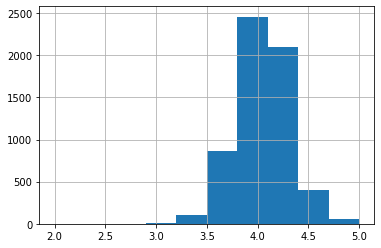

In [21]:
df.rating.hist()

We can make this better using things like seaborn, etc.

4.041997330218587 4.05


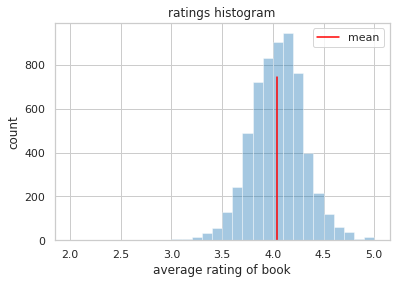

In [25]:
sns.set_context("notebook") # seaborn: This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.
meanrat=df.rating.mean()
print(meanrat, df.rating.median())
with sns.axes_style("whitegrid"): # other options are: 'darkgrid', 'white', 'ticks'
    df.rating.hist(bins=30, alpha=0.4) # alpha makes them semi-transparent, bins gives the number of bins
    plt.axvline(meanrat, 0, 0.75, color='r', label='mean') # adds a vertical line across the axis (the mean in this case)
    plt.xlabel("average rating of book")
    plt.ylabel("count")
    plt.title("ratings histogram")
    plt.legend()
    #sns.despine() # gets rid of the top...

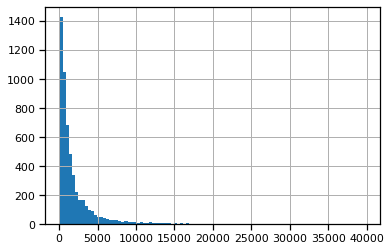

In [34]:
df.review_count.hist(bins=np.arange(0,40000,400)) # can also replace the bins variable with 'auto'

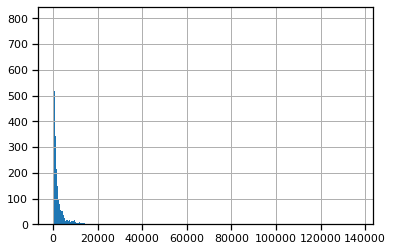

In [35]:
df.review_count.hist(bins='auto') # probably more useful in classic cases (such as that above)

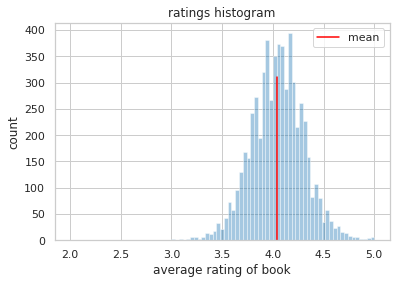

In [36]:
with sns.axes_style("whitegrid"): # other options are: 'darkgrid', 'white', 'ticks'
    df.rating.hist(bins='auto', alpha=0.4) # alpha makes them semi-transparent, bins gives the number of bins
    plt.axvline(meanrat, 0, 0.75, color='r', label='mean') # adds a vertical line across the axis (the mean in this case)
    plt.xlabel("average rating of book")
    plt.ylabel("count")
    plt.title("ratings histogram")
    plt.legend()
    #sns.despine() # gets rid of the top...

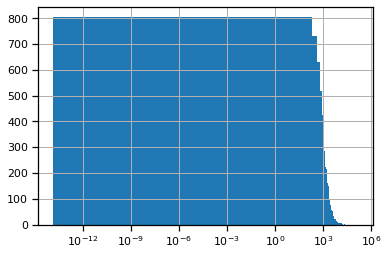

In [39]:
# let's change the x axis on review count to be log:

df.review_count.hist(bins='auto')
plt.xscale("log");

We can plot rating against year with a scatter. By setting the alpha low we can see how density of book ratings has changed over time:

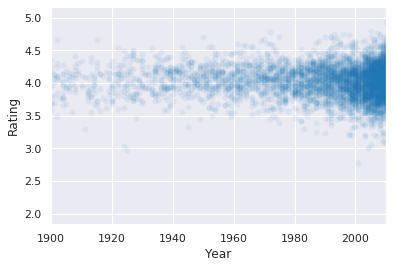

In [42]:
with sns.axes_style("darkgrid"):
    plt.scatter(df.year, df.rating, lw=0, alpha=.08) # lw is linewidth
    plt.xlim([1900,2010])
    plt.xlabel('Year')
    plt.ylabel('Rating')

### Vectorisation:

Numpy arrays are a bit different from simple Python lists - Pandas Series are built atop them

In [45]:
alist=[1,2,3,4,5]
alist + alist

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [46]:
np.array(alist)

array([1, 2, 3, 4, 5])

In [47]:
np.array(alist)+np.array(alist)

array([ 2,  4,  6,  8, 10])

Operations on numpy arrays (and therefore Pandas Series) are *vectorised*. You can add the two numpy lists by just using + whereas the result will be different for a Python list.

To add a regular Python list elementwise we would need to use a loop:

In [48]:
newlist=[]
for item in alist:
    newlist.append(item+item)
newlist

[2, 4, 6, 8, 10]

In [51]:
# More examples!

a=np.array([1,2,3,4,5])
print(type(a))
b=np.array([1,2,3,4,5])

print(a*b)

<class 'numpy.ndarray'>
[ 1  4  9 16 25]


In [52]:
a+1

array([2, 3, 4, 5, 6])